<div class="alert alert-block alert-success"><font size="5.5"><center><b><u>FINAL PROJECT: Barcelona Activa IT Academy 2021</u></b></center></font>
   
<b>\begin{align*} Oriol\:Gallemí\:Rovira\end{align*}</b>
\begin{align*}Advanced\hspace{2mm}Data\hspace{2mm}Science\hspace{2mm}And\hspace{2mm}Machine\hspace{2mm}Learning\hspace{2mm}Systems\end{align*}
$%$
\begin{align*}Advanced\hspace{2mm}Modeling\hspace{2mm}For\hspace{2mm}Combustion\hspace{2mm}Engines\hspace{2mm}In\hspace{2mm}Automobiles.\hspace{2mm}DataSource:\hspace{2mm}Car2DB.com\end{align*}
$%$ 
\begin{align*}Date : December\hspace{2mm}2021\end{align*}</div>



- Pre-processat i data cleansing

- Anàlisi numèric i estadístic

- Anàlisi i representacions gràfiques

- Aplicació d'algoritmes i tècniques d'extracció d'informació

- Presentació de la informació extreta i conclusions

## Annex al notebook hi ha un fitxer de dades de mostra i un document word on s'explica els metodes de pre tractament realitzats abans de la càrrega del dataframe

#  1. Càrrega d'entorn de treball

In [1]:
# Importacio llibreries globals

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import xgboost as xgb
import pydotplus
#import pydot
import graphviz
import time
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
import scipy.cluster.hierarchy as shc

#%matplotlib notebook per poder fer resize als plots interactius
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
#from sklearn.pipeline import make_pipeline, Pipeline
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#from sklearn.datasets import make_classification
#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz

st = time.time()

In [2]:
# definicio parametres globals

#pd.set_option('display.mpl_style','default') #fer gràfics grans
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 50)
#plt.rcParams.update({'font.size':20,'figure.figsize':(10:8)}) #set plot params. Categoriques: barchar i boxplot. numeriques Histo/scatter/linies/boxplot#


In [3]:
# FUNCIO per trobar gaps al format del DF (fora nan's, mida i forma)
def quick_analysis(df):
 #print('Data Types:')
 #print(df.dtypes)
 print('General Information:')
 print(df.info())
 print('Rows and Columns:')
 print(df.shape)
# print('Column Names:')
# print(df.columns)
 print('Null Values:')
 print(df.apply(lambda x: sum(x.isnull()) / len(df)))
 print('Samples')
 print(df.head())
 print(df.tail())

# 2. Càrrega del bloc de dades en cru

In [4]:
# Lectura del paquet de dades
#motorsdf=pd.read_csv('C:\\Users\\oriol.gallemi\\ITA Projecte\\motorcolumns.csv', index_col=0, sep=';') #sep='\t', encoding='utf-8' #a vegades cal posar index_col=0 si no fos detectat inicialment
backupdf=pd.read_excel('C:\\Users\\oriol.gallemi\\ITA Projecte\\Car2DB_eng FULL 20211214.xlsx', index_col=0, verbose=True) # sheet_name=0, sep=';', engine='python', verbose=True, encoding_errors='ignore'

motorsdf=backupdf.copy() #deep=True
motorsdf.info()


Reading sheet 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          63390 non-null  object 
 1   Model         63389 non-null  object 
 2   Year_from     63202 non-null  float64
 3   Body          63389 non-null  object 
 4   Trim          63390 non-null  object 
 5   Seats         63180 non-null  float64
 6   Space         63390 non-null  float64
 7   Volume        63390 non-null  float64
 8   Af            63390 non-null  float64
 9   mass          56587 non-null  float64
 10  Wheel_size    13511 non-null  object 
 11  TrunkLitres   42057 non-null  float64
 12  Nm            62815 non-null  float64
 13  rpmNm         62567 non-null  float64
 14  Injection     59486 non-null  object 
 15  Camshaft      0 non-null      float64
 16  Cyl_layout    63361 non-null  object 
 17  Cyl_count     63390 non-null  int64  
 18  Comp_

In [5]:
# Hi ha una variable buida
motorsdf.drop(['Camshaft'], axis=1, inplace=True)

# 3. Depurat NaN, incompletes, incongruents, errònies
per a totes motorsdf.columns # corregir Typos

In [6]:
motorsdf.Body.value_counts() #cal reetiquetar a clusters més grans. redueixo els numero de valors únics, a estudiar.

Sedan                                11793
Coupe                                 4151
Hatchback 5-doors                     2886
wagon                                 2648
Hatchback                             2591
                                     ...  
F-150 SVT Lighting pickup 2-doors        1
Volt                                     1
VT Coupe                                 1
Aileron Coupe 2-doors                    1
Supersports cabriolet 2-doors            1
Name: Body, Length: 1186, dtype: int64

In [7]:
motorsdf.Boost.value_counts()

Turbo                   12052
none                    11547
turbine                  5378
Biturbo                   832
compressor                593
Turbine + compressor      284
Twin-scroll               163
Triple turbo                8
Intercooler                 2
Name: Boost, dtype: int64

In [8]:
# limitar camps i corregir codificacions BOOST
motorsdf['Boost']=motorsdf['Boost'].str.replace("turbine", "Turbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("none", "Natural", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Intercooler", "Turbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Twin-scroll", "Turbo", regex=False)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Turbine + compressor", "Biturbo", regex=False)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Triple turbo", "Triturbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("compressor", "Turbo", regex=False)

# comprova cleaning
motorsdf.Boost.value_counts()

Turbo       18188
Natural     11547
Biturbo      1116
Triturbo        8
Name: Boost, dtype: int64

In [9]:
motorsdf.Injection.value_counts()

Multi-point fuel injection                                                       23333
carburetor                                                                       11394
distributed injection (multipoint)                                                6825
direct injection                                                                  6464
Common Rail                                                                       5529
Injector                                                                          2441
direct injection (direct)                                                         2163
Monoinjection                                                                      700
Central injection (single-point or single-point)                                   369
Central injection                                                                  204
combined injection (direct-distributed)                                             57
the engine is not separated by the combusti

In [10]:
# limitar camps i corregir codificacions INJECTION
motorsdf['Injection']=motorsdf['Injection'].str.replace("Multi-point fuel injection", "Multipoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("carburetor", "Carburetor", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("distributed injection (multipoint)", "Multipoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("direct injection (direct)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("direct injection", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Common Rail", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Monoinjection", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Central injection (single-point or single-point)", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Central injection", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Injector", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("combined injection (direct-distributed)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("the engine is not separated by the combustion chamber (direct fuel injection)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Diesel", "Direct", regex=False)

# comprova cleaning
motorsdf.Injection.value_counts()

Multipoint     30158
Direct         14220
Carburetor     11394
Singlepoint     3714
Name: Injection, dtype: int64

In [11]:
motorsdf.Cycle.value_counts()

Gasoline                         38766
petrol                           11069
Diesel                            9596
diesel                            3184
Hybrid                             348
hybrid                             192
Gasoline, Gas                      129
Liquefied coal hydrogen gases       60
Gas                                 40
Petrol                               4
Gasoline, Electric                   1
Diesel, Hybrid                       1
Name: Cycle, dtype: int64

In [12]:
# limitar camps i corregir codificacions CYCLE
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("petrol", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("diesel", "Diesel", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("hybrid", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Multi-point fuel injection", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Multi-point fuel injection", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline, Gas", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Liquefied coal hydrogen gases", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Petrol", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Diesel, Hybrid", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline, Electric", "Hybrid", regex=False)

In [13]:
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline", "Otto", regex=False)

In [14]:
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gas", "Otto", regex=False)

# comprova cleaning
motorsdf.Cycle.value_counts()

Otto      50068
Diesel    12780
Hybrid      542
Name: Cycle, dtype: int64

In [15]:
motorsdf.Cyl_layout.value_counts()

Inline                     31686
V-type                     16208
inline                     13980
Opposed                      984
opposed                      423
W-type                        52
V-type with small angle       16
Rotary-piston                 11
rotor                          1
Name: Cyl_layout, dtype: int64

In [16]:
# limitar camps i corregir codificacions CYL_LAYOUT
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("inline", "Inline", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("V-type with small angle", "V-type", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("opposed", "Opposed", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("Rotary-piston", "Rotary", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("rotor", "Rotary", regex=False)

# comprova cleaning
motorsdf.Cyl_layout.value_counts()

Inline     45666
V-type     16224
Opposed     1407
W-type        52
Rotary        12
Name: Cyl_layout, dtype: int64

In [17]:
motorsdf.Drive.value_counts()

Front wheel drive           29444
Rear wheel drive            20071
All wheel drive (AWD)        7001
full                         4694
Four wheel drive (4WD)       2158
Constant all wheel drive       21
3500                            1
Name: Drive, dtype: int64

In [18]:
# limitar camps i corregir codificacions DRIVE
motorsdf['Drive']=motorsdf['Drive'].str.replace("Front wheel drive", "FWD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Rear wheel drive", "RWD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("All wheel drive (AWD)", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("full", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Four wheel drive (4WD)", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Constant all wheel drive", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("3500", "", regex=False)

# comprova cleaning
motorsdf.Drive.value_counts()

FWD    29444
RWD    20071
4WD    13874
Name: Drive, dtype: int64

In [19]:
motorsdf.Gear_type.value_counts()

Manual                                      33230
Automatic                                   25664
robot                                        2517
Continuously variable transmission (CVT)     1870
Electronic with 2 clutch                       86
Electronic with 1 clutch                       22
Direct-shift                                    1
Name: Gear_type, dtype: int64

In [20]:
# limitar camps i corregir codificacions GEAR_TYPE
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("robot", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Continuously variable transmission (CVT)", "CVT", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Electronic with 2 clutch", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Electronic with 1 clutch", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Direct-shift", "Automatic", regex=False)

# comprova cleaning
motorsdf.Gear_type.value_counts()

Manual       33230
Automatic    28290
CVT           1870
Name: Gear_type, dtype: int64

In [21]:
motorsdf.Fuel.value_counts()

Super          46147
diesel         12728
80              1036
Gasoline         856
Ethanol          247
Gas              209
diesel fuel       37
Name: Fuel, dtype: int64

In [22]:
# limitar camps i corregir codificacions FUEL ### carburants GAS i ETANOL, can canviar densitats g/km
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("Super", "Petrol", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("80", "LowGrade", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("Gasoline", "Petrol", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("diesel fuel", "Diesel", regex=False)

In [23]:
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("diesel", "Diesel", regex=False)

# comprova cleaning
motorsdf.Fuel.value_counts()

Petrol     47003
Diesel     12765
Ethanol      247
Gas          209
Name: Fuel, dtype: int64

In [24]:
#motorsdf=backupdf.copy() ################################################################################################

In [25]:
quick_analysis(motorsdf)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          63390 non-null  object 
 1   Model         63389 non-null  object 
 2   Year_from     63202 non-null  float64
 3   Body          63389 non-null  object 
 4   Trim          63390 non-null  object 
 5   Seats         63180 non-null  float64
 6   Space         63390 non-null  float64
 7   Volume        63390 non-null  float64
 8   Af            63390 non-null  float64
 9   mass          56587 non-null  float64
 10  Wheel_size    13511 non-null  object 
 11  TrunkLitres   42057 non-null  float64
 12  Nm            62815 non-null  float64
 13  rpmNm         62567 non-null  float64
 14  Injection     59486 non-null  object 
 15  Cyl_layout    63361 non-null  object 
 16  Cyl_count     63390 non-null  int64  
 17  Comp_ratio    17256 non-null  float64
 18  

# 4. Anàlisi exploratòria de primer nivell per veure si hi ha correlacions fortes a primera vista

In [26]:
motorsdf.corr()

,Year_from,Seats,Space,Volume,Af,mass,TrunkLitres,Nm,rpmNm,Cyl_count,Comp_ratio,PistonSpeed,BMEP,Cyl_valves,Bore,Stroke,FlagMismatch,kW,rpmkW,Displacement,Gear_count,Fuel_tank,Acceleration,Speed,Cons,ekWh,ekm,eWh/km
Year_from,1.000000,0.014779,-0.048412,0.095163,0.221169,0.146683,0.134976,0.096346,-0.060511,-0.305626,0.233033,0.211227,0.617675,0.638309,-0.336008,0.166467,-0.027974,0.126733,0.123571,-0.306813,0.720680,-0.101695,-0.351896,0.409137,-0.474820,0.220458,0.313082,-0.082770
Seats,0.014779,1.000000,0.159889,0.260116,0.289772,0.188117,0.354740,-0.049851,-0.100546,-0.060760,0.122761,-0.067460,-0.013824,0.011872,0.040975,0.095523,0.016904,-0.118694,-0.117306,-0.019695,-0.051993,0.091280,0.189926,-0.236697,0.051667,-0.038877,0.001125,0.382596
Space,-0.048412,0.159889,1.000000,0.876130,0.665281,0.862505,0.289048,0.716501,-0.222097,0.667485,0.099614,-0.028179,0.031438,-0.122524,0.734066,0.516440,-0.033350,0.593153,-0.284455,0.781074,0.029302,0.832742,-0.360707,0.402571,0.572543,0.272543,-0.124293,0.608160
Volume,0.095163,0.260116,0.876130,1.000000,0.928734,0.907517,0.496389,0.583423,-0.236691,0.483722,0.210347,-0.069827,0.038120,-0.077953,0.593325,0.518801,-0.025211,0.425545,-0.314658,0.634937,0.077782,0.812302,-0.137502,0.115465,0.426054,0.208783,-0.114958,0.658308
Af,0.221169,0.289772,0.665281,0.928734,1.000000,0.815173,0.600385,0.437807,-0.241515,0.294363,0.260153,-0.077462,0.096200,0.003761,0.414684,0.461296,-0.014140,0.284445,-0.291862,0.439632,0.141494,0.663875,0.002103,-0.053619,0.237805,0.147916,-0.070205,0.584536
mass,0.146683,0.188117,0.862505,0.907517,0.815173,1.000000,0.422087,0.745978,-0.261845,0.594486,0.231339,-0.049531,0.144395,-0.010495,0.666600,0.575511,-0.043720,0.593453,-0.321569,0.723815,0.189402,0.850958,-0.347374,0.370599,0.505151,0.559548,0.135682,0.636449
TrunkLitres,0.134976,0.354740,0.289048,0.496389,0.600385,0.422087,1.000000,0.156818,-0.185179,0.063241,0.153683,-0.150158,0.083690,-0.021556,0.137860,0.202892,-0.000946,0.046074,-0.238752,0.139630,0.066079,0.297607,0.113134,-0.136667,0.001319,0.165402,-0.033734,0.403795
Nm,0.096346,-0.049851,0.716501,0.583423,0.437807,0.745978,0.156818,1.000000,-0.266958,0.737152,0.109582,-0.000623,0.373396,0.020317,0.634976,0.482152,-0.045493,0.882554,-0.236102,0.776612,0.274735,0.647442,-0.634942,0.680207,0.492647,0.280778,-0.143956,0.267085
rpmNm,-0.060511,-0.100546,-0.222097,-0.236691,-0.241515,-0.261845,-0.185179,-0.266958,1.000000,0.001258,-0.427033,0.544485,-0.420340,0.154147,-0.092634,-0.284007,0.009201,0.046437,0.668563,-0.081789,-0.185978,-0.131752,-0.069397,0.036864,0.123364,-0.243928,0.125103,0.153471
Cyl_count,-0.305626,-0.060760,0.667485,0.483722,0.294363,0.594486,0.063241,0.737152,0.001258,1.000000,-0.117741,0.003799,-0.208712,-0.275369,0.670207,0.185779,-0.015231,0.733842,-0.088466,0.897958,-0.146612,0.656321,-0.398578,0.438904,0.758931,0.079664,-0.422584,0.503036


<AxesSubplot:>

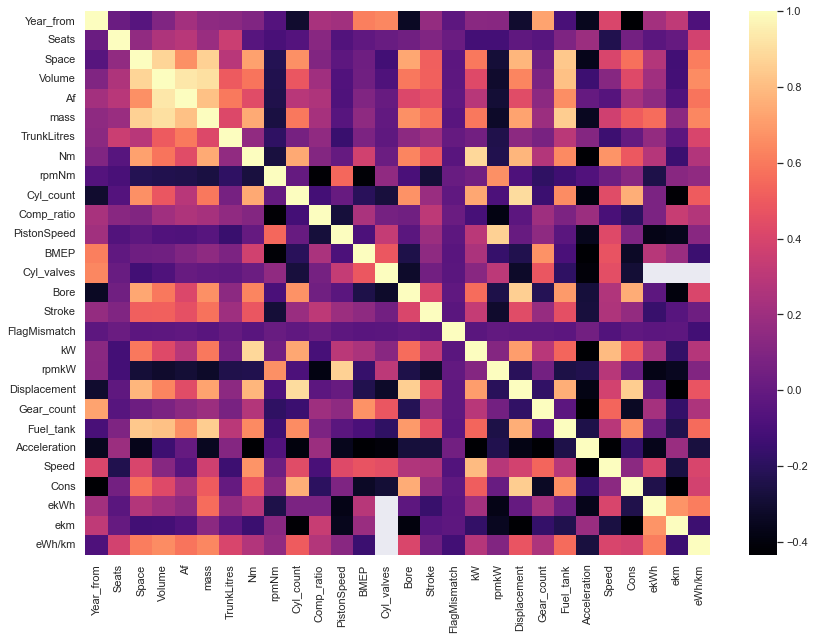

In [27]:
# millor vist en forma de Heatmap

sns.color_palette("magma", as_cmap=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(motorsdf.corr(), cmap='magma', robust=True, xticklabels=True, yticklabels=True)


<AxesSubplot:xlabel='mass', ylabel='Cons'>

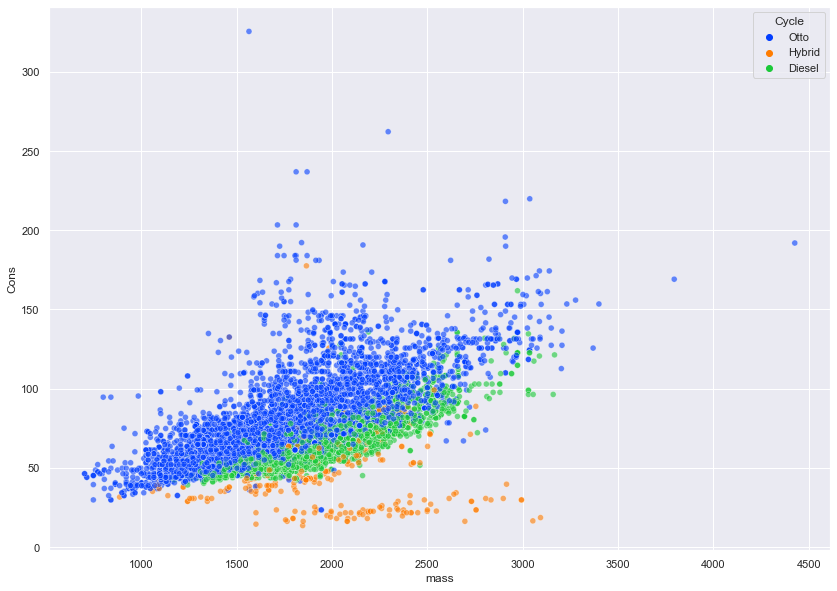

In [28]:
# plot dels models més contemporanis, per similitud tecnològica (turbo, injecció, electrònica)
sns.scatterplot(x='mass', y='Cons', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2010)&(motorsdf.Year_from < 2021)], alpha=0.6) 
#'Spectral','viridis','rocket', 'Paired','hls'

<AxesSubplot:xlabel='mass', ylabel='Cons'>

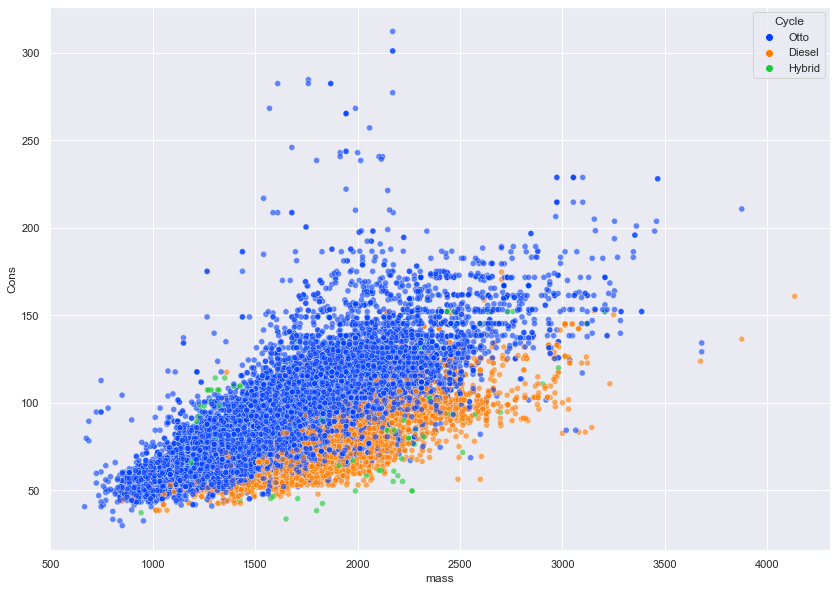

In [29]:
# plot dels models predecessors a la norma EURO V
sns.scatterplot(x='mass', y='Cons', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 1995)&(motorsdf.Year_from < 2011)], alpha=0.6)

### Es pot apreciar que s'ha generat una nova expècie de vehicles hibrids que presenten consums massics extremadament baixos en les proves d'homologacio, exhibint una clara discontinuitat

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

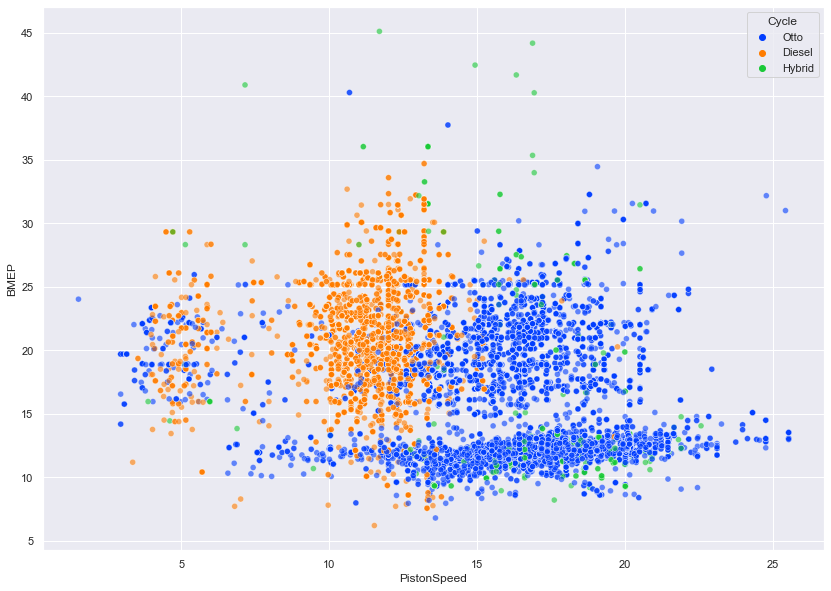

In [30]:
# plot dels models segons el tipus de cicle de combustió
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

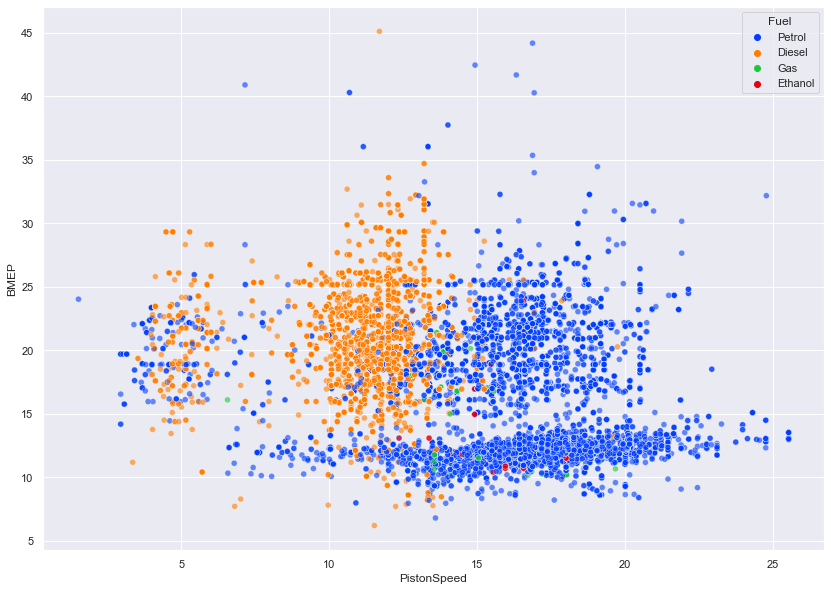

In [31]:
# plot dels models segons el carburant primari
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Fuel', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

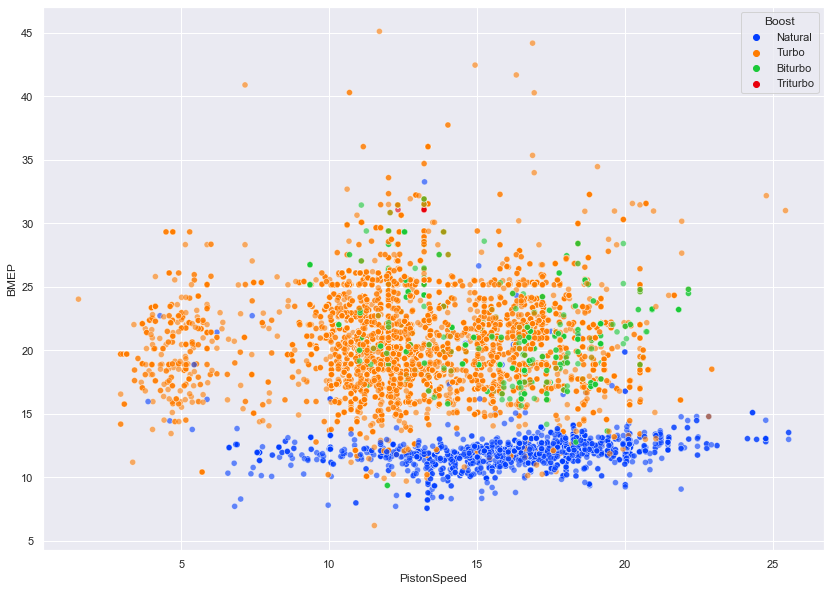

In [32]:
# plot dels models segons el nivell de sobrealimentació
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Boost', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

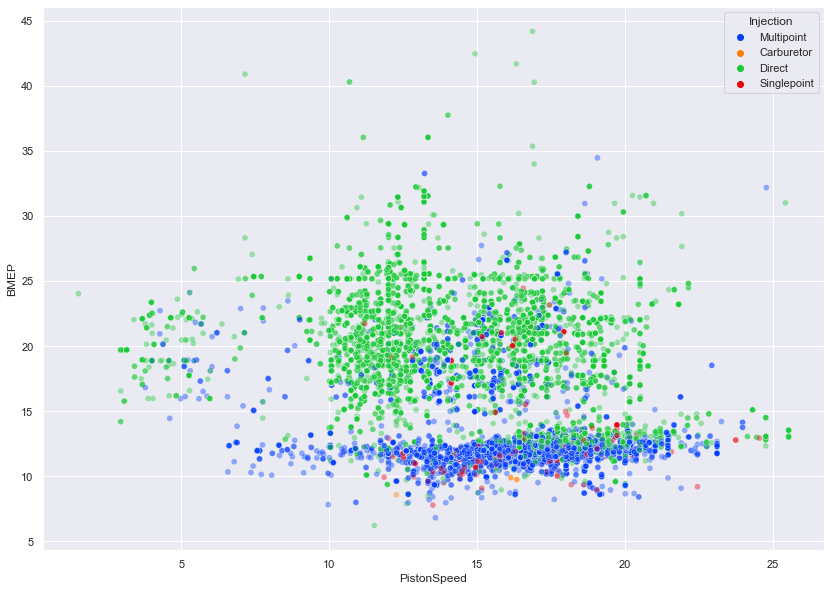

In [33]:
# plot dels models segons la tecnologia d'aportació de carburant
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Injection', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.4)

#### Aparentment, Fuel i Boost aporten gran informació de cara a la classificació. 

#### Sembla que es poden observar 4 grans blocs: un inferior (12-20,12) i 3 blocs verticals amb centres a (5,20) (12,20) i (17,20)

#### ALERTA, els intervals estan molt solapats, pel que segurament SVM no presentin un treshold prou gran. 

#### O es neteja de soroll o podria donar lloc a errors greus de classificació per llindars (Decision Trees, Random Forest)





# 5. Normalitzacio i estandardització de les dades

In [34]:
motorsdf.columns

Index(['Make', 'Model', 'Year_from', 'Body', 'Trim', 'Seats', 'Space', 'Volume', 'Af', 'mass', 'Wheel_size', 'TrunkLitres', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout', 'Cyl_count', 'Comp_ratio', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore', 'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Gear_type', 'Fuel_tank', 'Acceleration', 'Speed', 'Fuel', 'Cons', 'ekWh', 'ekm', 'eWh/km'], dtype='object')

In [35]:
sub_motorsdf=motorsdf[['Year_from', 'Space', 'Volume', 'Af', 'mass', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout',
                       'Cyl_count', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore',
                       'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Fuel_tank',
                       'Acceleration', 'Speed', 'Fuel', 'Cons']]
#sub_motorsdf.head()
quick_analysis(sub_motorsdf)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year_from     63202 non-null  float64
 1   Space         63390 non-null  float64
 2   Volume        63390 non-null  float64
 3   Af            63390 non-null  float64
 4   mass          56587 non-null  float64
 5   Nm            62815 non-null  float64
 6   rpmNm         62567 non-null  float64
 7   Injection     59486 non-null  object 
 8   Cyl_layout    63361 non-null  object 
 9   Cyl_count     63390 non-null  int64  
 10  Cycle         63390 non-null  object 
 11  PistonSpeed   62761 non-null  float64
 12  BMEP          63021 non-null  float64
 13  Cyl_valves    62918 non-null  float64
 14  Boost         30859 non-null  object 
 15  Bore          63390 non-null  float64
 16  Stroke        63390 non-null  float64
 17  FlagMismatch  63390 non-null  int64  
 18  

In [36]:
# cal eliminar tots els NaN
sub_motorsdf.dropna(axis=0, how='any', inplace=True)
sub_motorsdf.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(15178, 28)

In [37]:
# collocacio de dummies absoluts
#codifico algunes les columnes significatives, deixant marca i model a banda ()
dummy_cols = ['Injection', 'Cyl_layout', 'Cycle', 'Boost', 'Drive', 'Fuel']
sub_motorsdf = pd.get_dummies(sub_motorsdf, columns = dummy_cols)
sub_motorsdf.shape

(15178, 44)

### POST: sub_motorsdf conté tots els valors, incloent dummies

In [38]:
# normalitzavio i estandaritzacio
# PRE: entra de tot en format numèric pandas.df

# Normalize function the DF using min/max scaler. PCA requires [0...1]
def normalize(df):
    scaler = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    dates_scaled = scaler.fit_transform(df)
    return dates_scaled

# Normalization call 
Nsub_motorsnd = normalize(sub_motorsdf)
#POST: surten float64 normalitzats en un np.Array

In [39]:
Nsub_motorsdf=pd.DataFrame(Nsub_motorsnd, columns=sub_motorsdf.columns)
Nsub_motorsdf.shape

(15178, 44)

In [40]:
# Nsub_motorsdf conté les dades NORMALITZADES entre 0 i 1 per a una PCA
#quick_analysis(Nsub_motorsdf)

In [41]:
# observo noms de columnes a manipular
motorsdf.columns

Index(['Make', 'Model', 'Year_from', 'Body', 'Trim', 'Seats', 'Space', 'Volume', 'Af', 'mass', 'Wheel_size', 'TrunkLitres', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout', 'Cyl_count', 'Comp_ratio', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore', 'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Gear_type', 'Fuel_tank', 'Acceleration', 'Speed', 'Fuel', 'Cons', 'ekWh', 'ekm', 'eWh/km'], dtype='object')

In [42]:
# selected data subset SUB MOTOR DF
sub_motordf=motorsdf[['Year_from', 'Seats', 'Space', 'Volume', 'Af', 'Nm', 'Cyl_count', 'PistonSpeed', 'BMEP', 'Cyl_valves',  'Bore', 'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Gear_count', 'Fuel_tank', 'mass', 'Cycle', 'Boost', 'Fuel', 'Cons', 'Acceleration', 'Speed']]

In [43]:
# eliminacio de NaN
sub_motordf.dropna(subset=['Year_from', 'Seats', 'Nm', 'PistonSpeed', 'Boost', 'Fuel'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
# reompliment de NaN a cyl_valves, gear_count i Fuel_tank
sub_motordf=sub_motordf.fillna(sub_motordf.mean(numeric_only=True))

In [45]:
# selection of values to clean. drop entire rows or fillna
quick_analysis(sub_motorsdf)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15178 entries, 265743 to 234451
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_from              15178 non-null  float64
 1   Space                  15178 non-null  float64
 2   Volume                 15178 non-null  float64
 3   Af                     15178 non-null  float64
 4   mass                   15178 non-null  float64
 5   Nm                     15178 non-null  float64
 6   rpmNm                  15178 non-null  float64
 7   Cyl_count              15178 non-null  int64  
 8   PistonSpeed            15178 non-null  float64
 9   BMEP                   15178 non-null  float64
 10  Cyl_valves             15178 non-null  float64
 11  Bore                   15178 non-null  float64
 12  Stroke                 15178 non-null  float64
 13  FlagMismatch           15178 non-null  int64  
 14  kW                     1517

In [46]:
# Generació dels fitxers de predictors i resultats
X=sub_motordf[['Year_from', 'Seats', 'Space', 'Volume', 'Af', 'Nm', 'Cyl_count', 'PistonSpeed', 'BMEP', 'Cyl_valves',  'Bore', 'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Gear_count', 'Fuel_tank', 'mass', 'Cons', 'Acceleration', 'Speed']]
y=sub_motordf[['Cycle', 'Boost', 'Fuel']]
X.shape

(28215, 22)

# Mètode A: genera PCA prèvia a la classificació per reducció dimensional

In [47]:
# Creo instancia de PCA, especificant numero de components o variança explicada
pca = PCA(n_components=22) # opto per al màxim de variables
# pca = PCA(0.95, whiten=True)

# Aplico la transformació a components principals al df normalitzat
data = pca.fit_transform(X) #Nsub_motorsdf X
data.shape

(28215, 22)

In [48]:
# sns.heatmap(data, cmap='magma', robust=True, xticklabels=True, yticklabels=True)

In [49]:
# Pregunto quanta infomació s'ha obtingut, fins a quina variança s'explica
pca.explained_variance_ratio_.sum()
# Pregunto el nomrbre de components que s'ha obtingut per al nivell explicatiu demanat
#pca.n_components

1.0

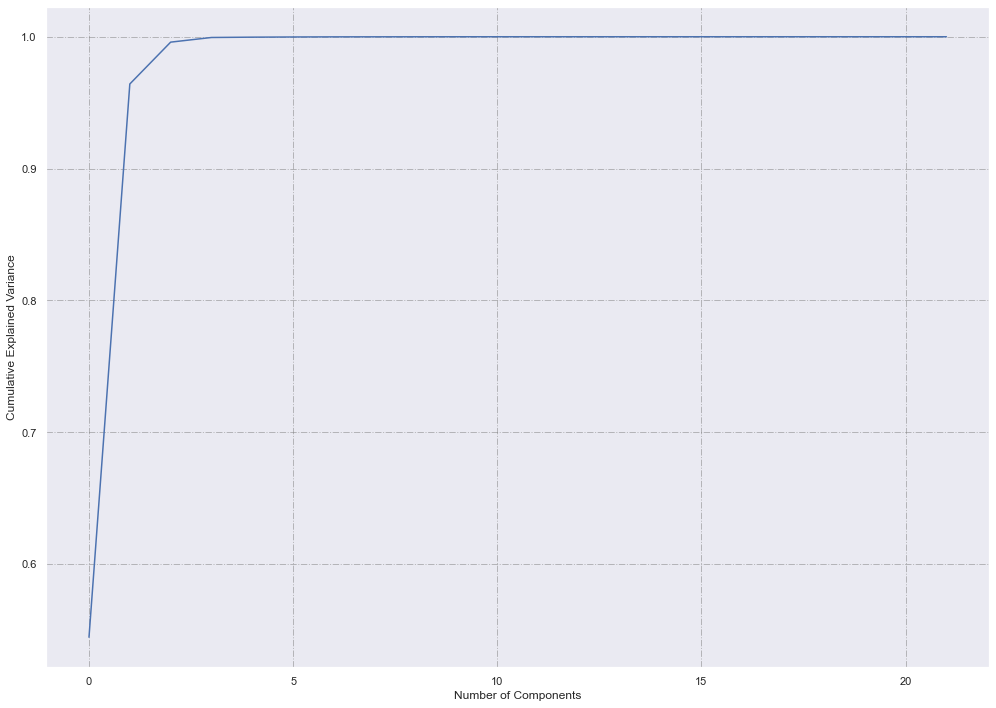

In [50]:
# Plot n components optim, observant que a partir de 20 és un evident overfit
# 10 components probablement sigui més que suficient i amb 6 s'està per sobre del 85%
sns.set(rc={'figure.figsize':(14,10)})

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.5)
plt.tight_layout();

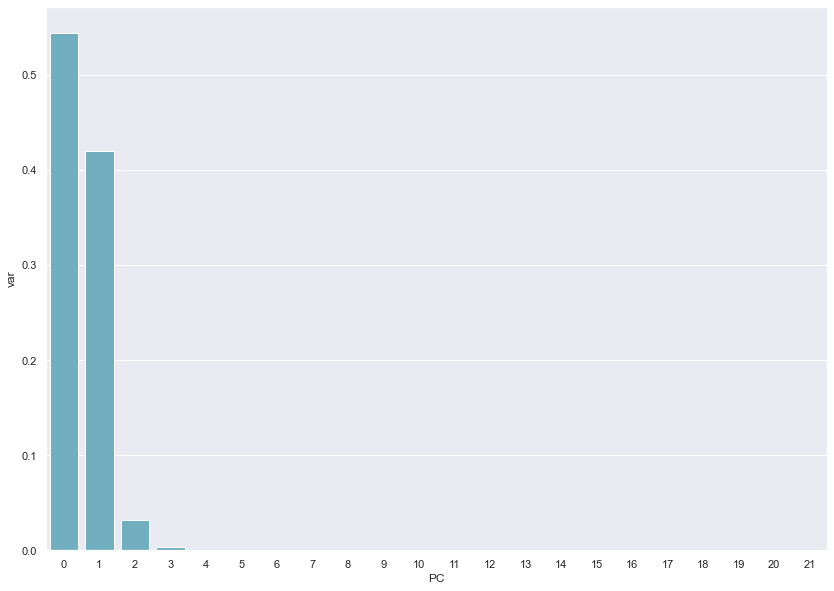

In [51]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':range(0,22)})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [52]:
# Genero model reduint les components al numero optim
pca = PCA(n_components=4)

In [53]:
# Transformo a components principals el df normalitzat
data = pca.fit_transform(X) #Nsub_motorsdf X
print(data.shape)
print(pca.explained_variance_ratio_.sum())

(28215, 4)
0.9994359518981834


 ## Interpretació de la PCA:

In [54]:
## DEFINE THE MOST IMPORTANT FEATURES
# number of components 
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,rpmkW
1,PC1,Displacement
2,PC2,mass
3,PC3,Nm


## The main 4 PC are strongly correlated to rpmkW, Displacement, mass and Nm.
## Therefore, those features must be kept in order to predict accurately Boost, Fuel and Cycle

## Thanks to this dimensional reduction, a KNN classifier can be launched with larger K (reduced variance, higher bias)

In [55]:
# "data" dataset is split in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,0], test_size=0.2,random_state=1) #y.iloc[:,0]

In [56]:
# Agruparem mitjançant KNN
classifier = KNeighborsClassifier(n_neighbors=50) # poso 10 veins per no apretar massa la màquina
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [57]:
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[2157    0  107]
 [   6    0   43]
 [ 234    0 3096]]
              precision    recall  f1-score   support

      Diesel       0.90      0.95      0.93      2264
      Hybrid       0.00      0.00      0.00        49
        Otto       0.95      0.93      0.94      3330

    accuracy                           0.93      5643
   macro avg       0.62      0.63      0.62      5643
weighted avg       0.92      0.93      0.93      5643



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWa

Text(0, 0.5, 'Mean Error')

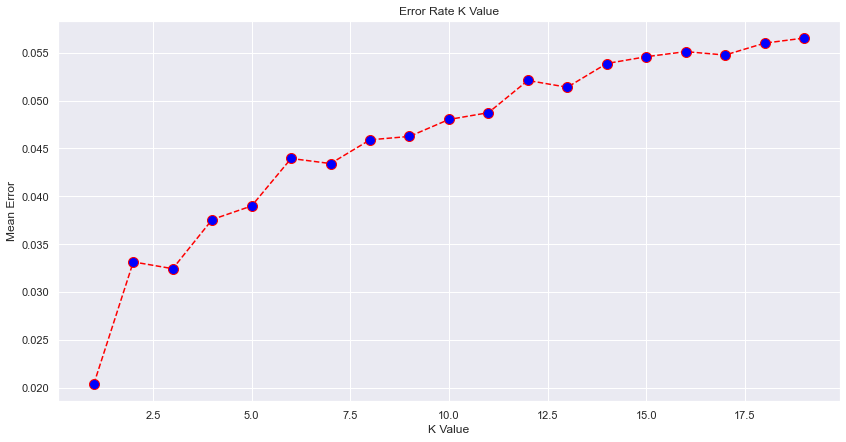

In [58]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(14, 7))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Mètode B
# Reconstruint un model, però ara en base a classificadors aglomeratius

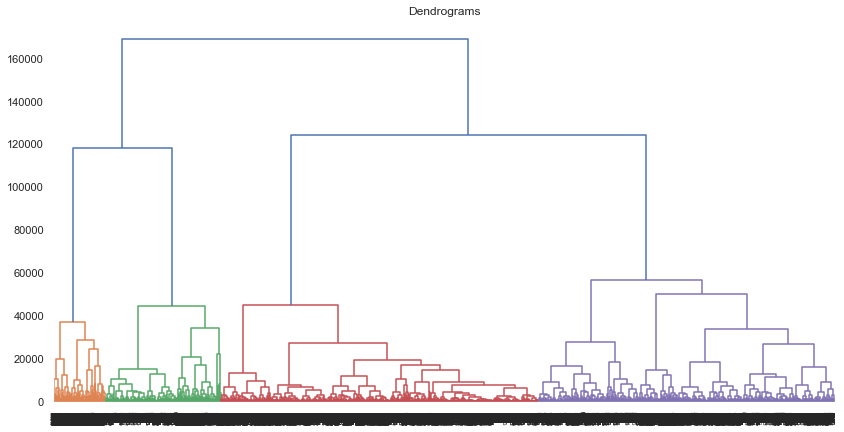

In [59]:
# classificació i dendrograma

plt.figure(figsize=(14, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sub_motorsdf, method='ward'))

## Aparentment cal classificar aglomeradament segons 4 clusters

In [60]:
# aplicant cluster aglomeratiu

cluster = AgglomerativeClustering(n_clusters=50, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([45, 45, 45, ..., 42, 22, 22], dtype=int64)

In [61]:
# escollint nombre de clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 15,
    "max_iter": 300,
    "random_state": 42,
}

#import os posat ABANS de import NUMPY
#os.environ['OMP_NUM_THREADS'] = "19" #evita que OpenMP obri massa fils per cada CPU 1

# A list holding SSE values for each k
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs,) #**operador per desfer llistes UNPACKING
    kmeans.fit(Nsub_motorsdf)
    sse.append(kmeans.inertia_)

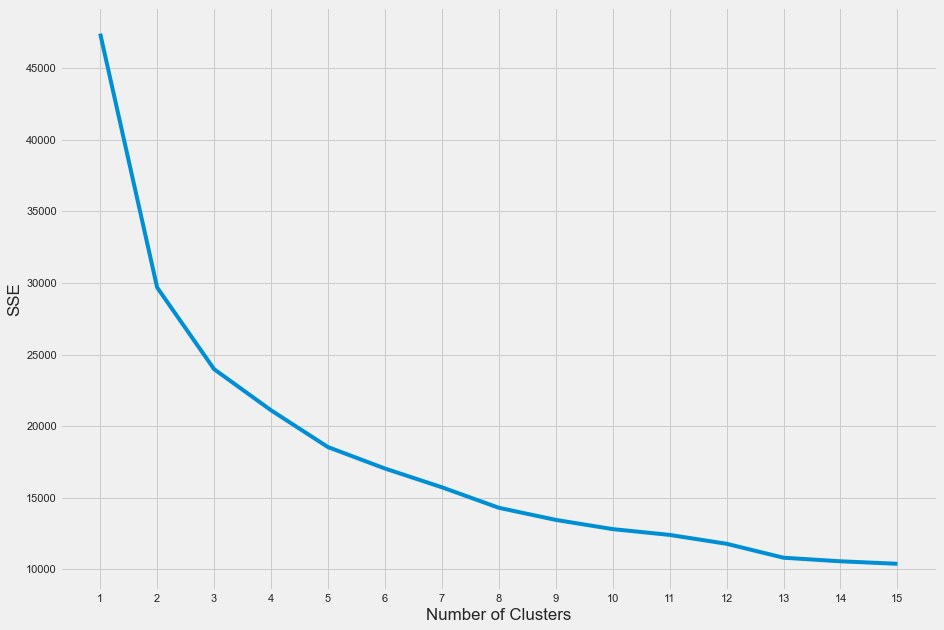

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 16), sse)
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [63]:
kl = KneeLocator( range(1, 16), sse, curve="convex", direction="decreasing")
kl.elbow

4

# Confirma que 4 clusters és suficient, com calculat abans

In [64]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# IMPORTANT to start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Nsub_motorsdf)
    score = silhouette_score(Nsub_motorsdf, kmeans.labels_)
    silhouette_coefficients.append(score)

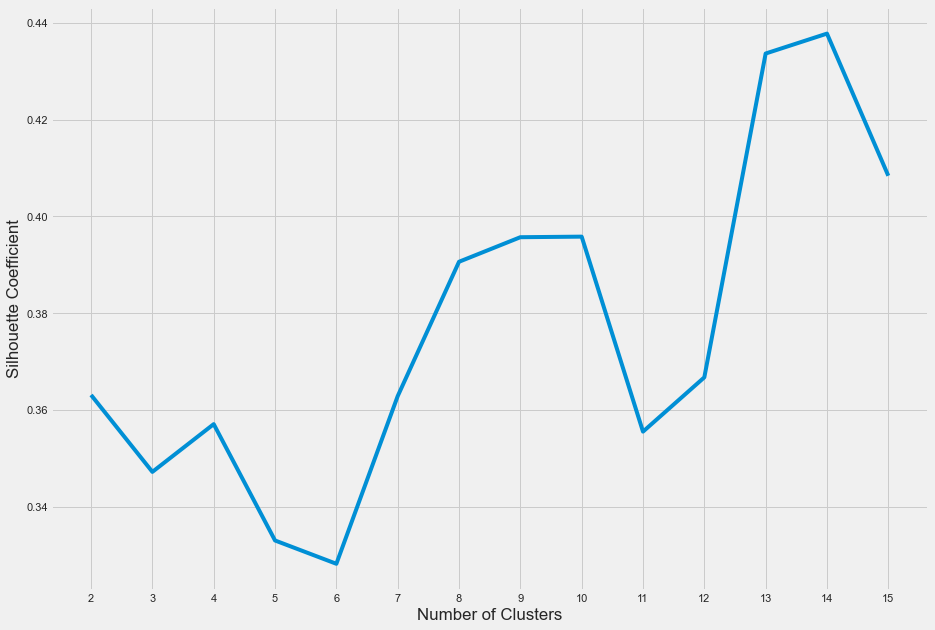

In [65]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#  Obviament, resulta trivial observar que el nombre òptim de clusters és de 9 a 14, tot i que el guany és poc respecte la simplicitat de 6 o 4.

# En tot cas, els clusters estan lleugerament solapats perquè Silhouette difereix de 0.

# Analitzant amb classificadors logístics per a determinar els atributs:

# - Cicle de combustió
# - Sobrealimentació
# - Carburant

*********************************************

In [66]:
# Classificar a quin tipus de motor pertany donades unes especificacions
# Dataset base motorsdf, conté les dades SENSE codificar

# Regressió logística, accepta 1 variable predicció (multicategoria), el fitxer es normalitza internament i accepta sparse

## Farem 3 models logístics multinomials, un per a cada variable objectiu: cycle, boost, fuel

In [67]:
# y.iloc[:,0] equival a y['Cycle'] o y.Cycle
# Subset en Train / Test splits (es podria estratificar)
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,0], test_size=0.2,random_state=1)

In [68]:
# Significància del split, compararem restant i normalitzant contra el test EN PERCENTATGE.
(X_train.describe()-X_test.describe())*100/X_test.describe()

,Year_from,Seats,Space,Volume,Af,Nm,Cyl_count,PistonSpeed,BMEP,Cyl_valves,Bore,Stroke,FlagMismatch,kW,rpmkW,Displacement,Gear_count,Fuel_tank,mass,Cons,Acceleration,Speed
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.005698,-0.134258,-0.011961,0.148498,0.250655,0.918147,0.312052,-0.338037,0.459347,-0.754850,0.093297,-0.134086,-5.967742,0.411787,-0.153726,0.787435,0.052955,0.003403,0.294215,0.243155,-0.058517,-0.084503
std,-0.414991,-4.060832,0.713606,0.062391,0.092043,2.895227,3.286419,-0.911436,1.159623,1.247514,3.116860,1.911286,-2.868177,3.451741,-0.251701,4.935325,-0.061648,1.424545,0.695204,2.821732,-2.156609,0.873399
min,0.000000,100.000000,-1.015842,0.000000,0.000000,0.000000,0.000000,-51.693122,-11.722423,0.000000,0.000000,-0.363636,NaN,11.538462,-54.166667,0.000000,0.000000,-4.761905,0.000000,12.469394,-10.714286,754.700855
25%,0.050125,0.000000,-0.118750,0.040191,0.171990,0.555556,0.000000,0.000000,0.012596,-14.711524,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-1.886792,-0.126761,-0.053197,1.204819,-0.531915
50%,0.000000,0.000000,-0.202971,0.040437,0.213364,2.000000,0.000000,-0.250000,0.922077,0.000000,0.000000,0.000000,NaN,0.000000,-2.083333,0.000000,0.000000,0.000000,0.048422,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.007315,0.283477,0.468775,0.000000,0.000000,-1.058038,0.184561,0.000000,0.578035,0.000000,NaN,0.000000,0.000000,0.040080,0.000000,0.000000,0.264460,0.492864,0.000000,-0.462963
max,0.000000,0.000000,0.000000,0.000000,22.899160,36.363636,33.333333,0.000000,25.192308,0.000000,0.000000,15.245009,0.000000,44.680851,3.448276,11.302733,0.000000,0.000000,6.829619,21.388889,-36.363636,10.199005


In [69]:
#logistic regression instance
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=4000, multi_class='auto', verbose=2)

In [70]:
#logistic regression training
logisticRegr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s finished


LogisticRegression(max_iter=4000, verbose=2)

In [71]:
# Returns a NumPy Array.
# Make predictions on entire test dataset
predictions = logisticRegr.predict(X_test) #.reshape(1,-1)

In [72]:
# Measure model performance
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9714690767322346


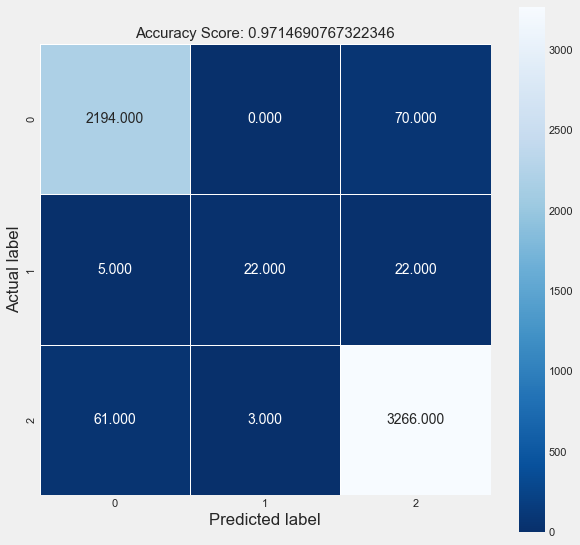

In [73]:
# measure by confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionSeabornMotorCycle.png')
#plt.show();

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.9s finished


0.9269891901470849


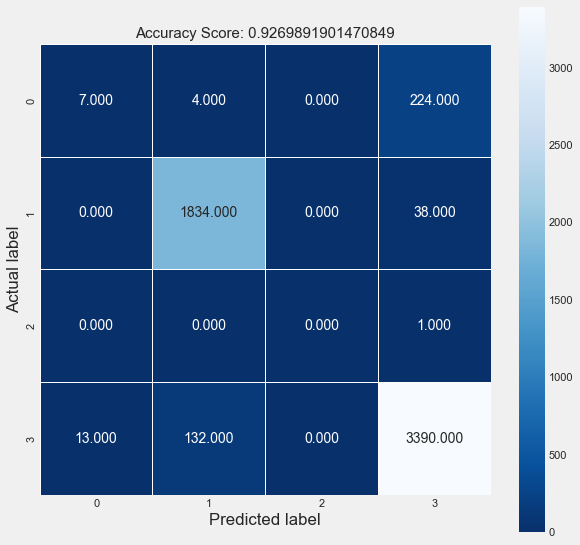

In [74]:
# y.iloc[:,1] equival a BOOST
# Subset en Train / Test splits (es podria estratificar)
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,1], test_size=0.2,random_state=1)

# Significància del split, compararem restant i normalitzant contra el test EN PERCENTATGE.
(X_train.describe()-X_test.describe())*100/X_test.describe()

#logistic regression instance
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=4000, multi_class='auto', verbose=2)

#logistic regression training
logisticRegr.fit(X_train, y_train)

# Returns a NumPy Array.
# Make predictions on entire test dataset
predictions = logisticRegr.predict(X_test) #.reshape(1,-1)

# Measure model performance
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

# measure by confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionSeabornMotorBoost.png')
#plt.show();

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s finished


0.9725323409533936


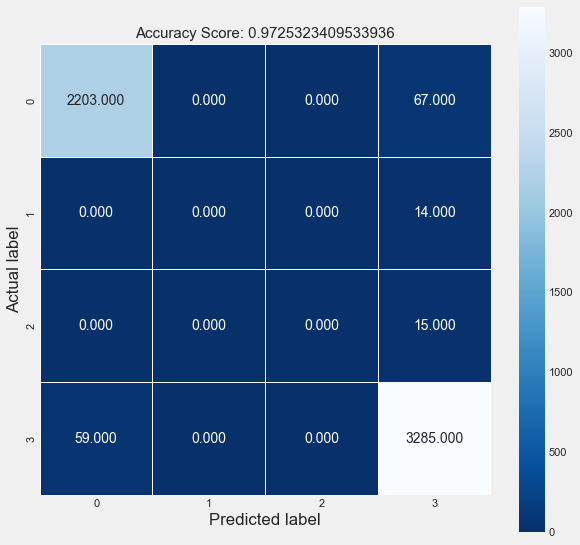

In [75]:
# y.iloc[:,2] equival a FUEL
# Subset en Train / Test splits (es podria estratificar)
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,2], test_size=0.2,random_state=1)

# Significància del split, compararem restant i normalitzant contra el test EN PERCENTATGE.
(X_train.describe()-X_test.describe())*100/X_test.describe()

#logistic regression instance
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=4000, multi_class='auto', verbose=2)

#logistic regression training
logisticRegr.fit(X_train, y_train)

# Returns a NumPy Array.
# Make predictions on entire test dataset
predictions = logisticRegr.predict(X_test) #.reshape(1,-1)

# Measure model performance
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

# measure by confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionSeabornMotorFuel.png')
#plt.show();

## Amb les dades inicials es pot predir amb una determinació superior al 90% el tipus de cicle, sobrealimentació i carburant del motor

# Finalment, es busca una regressió contínua que donats uns predictors, estimi el consum del vehicle

## Les variables estudiades anteriorment es carreguen el model codificades com a Sparse Matrix

In [76]:
# Càrrega de dades predictors i objectiu 
X=motorsdf[['Year_from', 'Space', 'Volume', 'Af', 'mass', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout',
                      'Cyl_count', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore',
                      'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Fuel_tank',
                      'Acceleration', 'Speed', 'Fuel','Cons']] #sub_motorsdf
# neteja de NaN
X.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [77]:
# Separació d'objectiu
y=X[['Cons']]
X.drop(['Cons'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
# collocacio de dummies absoluts
#codifico algunes les columnes significatives, deixant marca i model a banda ()
dummy_cols = ['Injection', 'Cyl_layout', 'Cycle', 'Boost', 'Drive', 'Fuel','Injection']
X = pd.get_dummies(X, columns = dummy_cols)

In [79]:
quick_analysis(X)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15178 entries, 265743 to 234451
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_from              15178 non-null  float64
 1   Space                  15178 non-null  float64
 2   Volume                 15178 non-null  float64
 3   Af                     15178 non-null  float64
 4   mass                   15178 non-null  float64
 5   Nm                     15178 non-null  float64
 6   rpmNm                  15178 non-null  float64
 7   Cyl_count              15178 non-null  int64  
 8   PistonSpeed            15178 non-null  float64
 9   BMEP                   15178 non-null  float64
 10  Cyl_valves             15178 non-null  float64
 11  Bore                   15178 non-null  float64
 12  Stroke                 15178 non-null  float64
 13  FlagMismatch           15178 non-null  int64  
 14  kW                     1517

In [80]:
print(X.shape)
print(y.shape)

(15178, 47)
(15178, 1)


In [81]:
###### Definint unes especificacions, trobar quin consum donarà

# Regressio linial i polinòmica multifactorials.
# Regressió linial NO EN FA CAP PINTA pel pairplot inicial Polinòmica de grau 2.

X = np.array(X) ###INPUT BIDIMENSIONAL SEMPRE minim 1 col x n files!!!! .reshape((-1, 1))
y = np.array(y)

#inicialitzo les variables, poso els valors de x, x^2 ... per la regressio
X_ = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True).fit_transform(X) 
print(X_)

#model = LinearRegression() #genera variable model amb les components a modelar
#model.fit(X, y) #calcula els pesos de les variables. Retorna "self". Retorna "model"
# Redueix les dues operacions model() i fit() solapant mètodes a 1 linia
model = LinearRegression().fit(X_, y) 
r_sq = model.score(X_, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_) #matriu de coeficients de la regressió

[[1.0000000e+00 1.9870000e+03 7.6954500e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.9670000e+03 7.3853000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.9830000e+03 8.7198980e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 2.0080000e+03 1.0091487e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0130000e+03 1.0195276e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0130000e+03 1.0513216e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
coefficient of determination: 0.9028888526485341
intercept: [-18657.39514106]
coefficients: [[ 8.64968118e-04  7.00780304e+00 -7.22129114e+01 ... -2.43165035e+01
   0.00000000e+00  6.95077440e+01]]


In [82]:
# i comparant consums estimats Vs consums REALS (y), es calcula el MSE
y_pred=model.predict(X_)
print (mean_squared_error(y, y_pred, multioutput='raw_values'))

[64.56367568]


In [85]:
print("--- %s seconds ---" % (time.time() - st))

--- 788.312066078186 seconds ---


# 6. Interpretacio de resultats

#### A priori, el heatmap revela ja correlacions positives i negatives entre variables com la relació de compressió i el parell màxim o la potència màxima.
#### Efectivament, l'any de preducció esta negativament correlacionat amb el consum, pel que els nous vehicles consumeixen lleugerament menys
#### Igualment, la massa afecta positivament el consum i requereis de motors més potents i amb major desplaçament


#### Els gràfics de consum i massa estratificats ens resulten d'especial interès ja que revelen la *trampa* dels híbrids i el cicle d'homologació.
#### Presenten una discontinuitat gràcie a disposar de bateries molt petites per recórrer pocs km. Es podria deduir a quina franja de consums pertanyen realment.
#### El model es basaria en la continuitat del model numèric de models anteriors i posteriors donades les caracteristiques del vehicle per donar un consum més realista que el publicat.

#### Respecte al bloc de motors, destacaria l'agrupament en 4 grans blocs segons BMEP i PistonSpeed.
#### Caldria fer un anàlisi profund dels diferents predictors per deduir les caracteristiques principals dels 4 grups, i tots els anàlisis coincideixen en que hi ha efectivament 4 clusters solapats.

#### La PCA revela que amb 4 predictors, és suficient com per classificar el 99,94% de la mostra i que gran influència la tenen rpmkW, Displacement, mass i Nm

#### Aplicant un KNN, i també en base a un dendrograma per a clústers aglomeratius (i aplicant després K-means), veiem que amb 4 clústers l'agrupació és suficientment bona

#### Amb 3 models logístics, classifiquem amb una R superior al 90% els atributs necessaris al motor de Carburant, Cicle i Sobrealimentació


## En resum, s'aconsegueix amb un nivell de confiança superior al 90% trobar els paràmetres de motor i classificar el vehicle segons la tecnologia a emprar. D'altra banda, la discontinuitat presentada pels hibrids mereixeria un estudi a banda per si sol.

In [84]:
# s'hauria de considerar un gradient Boost. Per a les regressions logístiques o augmentar el factor d'aprenentatge per reduir el nombre d'iteracions